<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Embeddings" data-toc-modified-id="Embeddings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Embeddings</a></span><ul class="toc-item"><li><span><a href="#PCA-illustration-of-getting-embeddings" data-toc-modified-id="PCA-illustration-of-getting-embeddings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>PCA illustration of getting embeddings</a></span><ul class="toc-item"><li><span><a href="#Unique-embeddings-for-hair-color" data-toc-modified-id="Unique-embeddings-for-hair-color-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Unique embeddings for hair color</a></span></li></ul></li><li><span><a href="#Supervised-example" data-toc-modified-id="Supervised-example-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Supervised example</a></span></li><li><span><a href="#Deep-learning-example" data-toc-modified-id="Deep-learning-example-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Deep learning example</a></span></li><li><span><a href="#Word-embeddings" data-toc-modified-id="Word-embeddings-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Word embeddings</a></span><ul class="toc-item"><li><span><a href="#Target-based-embedding" data-toc-modified-id="Target-based-embedding-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Target based embedding</a></span><ul class="toc-item"><li><span><a href="#Explainability-NO-consideration:-One-Hot-Encoding" data-toc-modified-id="Explainability-NO-consideration:-One-Hot-Encoding-1.4.1.1"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>Explainability <em>NO</em> consideration: One Hot Encoding</a></span></li><li><span><a href="#Connection-with-original-words-IS-important:-Tokenizer" data-toc-modified-id="Connection-with-original-words-IS-important:-Tokenizer-1.4.1.2"><span class="toc-item-num">1.4.1.2&nbsp;&nbsp;</span>Connection with original words <em>IS</em> important: Tokenizer</a></span></li><li><span><a href="#Difference-in-encoding" data-toc-modified-id="Difference-in-encoding-1.4.1.3"><span class="toc-item-num">1.4.1.3&nbsp;&nbsp;</span>Difference in encoding</a></span></li><li><span><a href="#Encoding-con't---Getting-the-embedding" data-toc-modified-id="Encoding-con't---Getting-the-embedding-1.4.1.4"><span class="toc-item-num">1.4.1.4&nbsp;&nbsp;</span>Encoding con't - Getting the embedding</a></span></li></ul></li><li><span><a href="#Corpus-context-based-embeddings" data-toc-modified-id="Corpus-context-based-embeddings-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Corpus context based embeddings</a></span><ul class="toc-item"><li><span><a href="#DIY" data-toc-modified-id="DIY-1.4.2.1"><span class="toc-item-num">1.4.2.1&nbsp;&nbsp;</span>DIY</a></span></li><li><span><a href="#Pre-trained-Embedding" data-toc-modified-id="Pre-trained-Embedding-1.4.2.2"><span class="toc-item-num">1.4.2.2&nbsp;&nbsp;</span>Pre-trained Embedding</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Word-vector-'Magic'" data-toc-modified-id="Word-vector-'Magic'-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Word vector 'Magic'</a></span></li><li><span><a href="#Appendix" data-toc-modified-id="Appendix-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Appendix</a></span></li></ul></div>

## Embeddings

*In this context* an embedding is a numerical representation of non-numerical data. The purpose is primarily for 'mathematical convenience' i.e. it enables computations to be made. For example: One Hot encoder encodes a categorical variable with 6 possible values for its value '3' to 0 0 1 0 0 0. In real life this may mean hair color 'blond'. For the complete picture:

Color  |  encoding
:--- |:--- |
Black | 1 0 0 0 0
Fair | 0 1 0 0 0
Blonde | 0 0 1 0 0
Red | 0 0 0 1 0
Gray | 0 0 0 0 1
None | 0 0 0 0 0

In traditional ML one hot encoding worked fine for most cases. However with the appearance of 'Big Data' some problems arose:  
    - The number of categories can be huge. E.g. consider the number of titles in the IMDB move database
    - The number of observations can be enormous
In this 'Big Data' environment One-hot encoding often results in extremely sparse matrices which any, machine or deep, learning algorithm  has problems dealing with.

Traditionally PCA would be applied to reduce the number of dimensions. But the disadvantage is that a inverse of the matrix is needed. For enormous data sets this is actually a memory/computational problem: Enter Embeddings/embedding layers.

Embedding is in that sense a dimensionality reduction technique to make large categorical data points computationally manageable. There are 2 types of reduction:

1. 'Unsupervised' in the sense that it takes the features at face-value  
PCA could serve as an example from the ML world. PCA tries to minimize the variation   
2. 'Supervised' in the sense it learns from a 'target', also called a 'learned' embedding.
LDA (Linear Discriminant Analysis) is an example. It tries to maximize the separation of known target categories.  

Since Bayes we know that the use of prior information will lead to better predictions. Therefore a 'supervised' embedding is preferred if possible, i.e. when the target is known. In practice a learned embedding if often more meaningful than the 'raw' feature itself.

When to use embeddings rather than One_hot?

It depends on the number of categories:

General rules of thumb:

- Under 10 : one hot  
- 10-50: use formula embedding_size = min(50, (NumberOfCats+1)/2) 
- over 50: 50 max.  



### PCA illustration of getting embeddings

Purely to illustrate what goes on under the hood.

In [283]:
from random import choice
import pandas as pd

#create categories
haircolor = ['black', 'blond', 'fair', 'red', 'grey', 'none', 'marron']

df = pd.DataFrame()

#create data
se = []
for i in range(100):
    se.append(choice(haircolor))
df['haircolor'] = se 

#get the One hot
df_ = pd.get_dummies(df[['haircolor']])

In [284]:
df.sample(10, random_state=1999)

,haircolor
41,blond
93,marron
30,marron
80,grey
26,red
12,marron
96,red
89,fair
63,blond
9,grey


In [285]:
df_.sample(10, random_state=1999)

,haircolor_black,haircolor_blond,haircolor_fair,haircolor_grey,haircolor_marron,haircolor_none,haircolor_red
41,0,1,0,0,0,0,0
93,0,0,0,0,1,0,0
30,0,0,0,0,1,0,0
80,0,0,0,1,0,0,0
26,0,0,0,0,0,0,1
12,0,0,0,0,1,0,0
96,0,0,0,0,0,0,1
89,0,0,1,0,0,0,0
63,0,1,0,0,0,0,0
9,0,0,0,1,0,0,0


In [286]:
from sklearn.decomposition import PCA

#pca 
pca = PCA(n_components=3)

pca.fit(df_)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Instead of 7 columns/vectors the feature space as been reduced to 3

In [287]:
df__ = pd.DataFrame(pca.transform(df_), columns=['Embed_1', 'Embed_2', 'Embed_3' ])
df__['haircolor'] = df['haircolor']
df__.sample(10,random_state=1999)

,Embed_1,Embed_2,Embed_3,haircolor
41,-0.360728,-7.071068e-01,-0.391375,blond
93,-0.360728,7.071068e-01,-0.391375,marron
30,-0.360728,7.071068e-01,-0.391375,marron
80,0.851572,2.898549e-15,-0.221542,grey
26,-0.044435,-1.225753e-15,0.138149,red
12,-0.360728,7.071068e-01,-0.391375,marron
96,-0.044435,-1.225753e-15,0.138149,red
89,-0.093764,-9.317203e-16,0.734017,fair
63,-0.360728,-7.071068e-01,-0.391375,blond
9,0.851572,2.898549e-15,-0.221542,grey


#### Unique embeddings for hair color

'haircolor' may be represented by columns 0,1 and 2 as feature.

In [288]:
df__.drop_duplicates()

,Embed_1,Embed_2,Embed_3,haircolor
0,-0.023676,-8.517528e-17,0.058712,black
1,0.851572,2.898549e-15,-0.221542,grey
2,-0.068439,-1.306421e-15,0.301105,none
5,-0.044435,-1.225753e-15,0.138149,red
6,-0.093764,-9.317203e-16,0.734017,fair
7,-0.360728,7.071068e-01,-0.391375,marron
20,-0.360728,-7.071068e-01,-0.391375,blond


### Supervised example

**Just illustrating the mechanics** 

Suppose this s part of marketing survey to see how likely people are to buy suntan lotion.

If possible supervised embedding is preferred over unsupervised, but only if it makes sense. I.e. there is a causal relationship between the 2 variables. In this case: hair color(o.k....sigh... *natural* hair color) has a causal relationship to the susceptibility of sunburn and therefore the likelihood to need, and therefore buy, suntan lotion.

In [7]:
# create categorical target with 5 values
df_['buy_suntan?'] = 'likely'

df_.loc[(df_['haircolor_black'] == 1) | (df_['haircolor_marron'] == 1), 'buy_suntan?'] = 'unlikely'
df_.loc[(df_['haircolor_grey'] == 1), 'buy_suntan?'] = 'possible'
df_.loc[(df_['haircolor_none'] == 1), 'buy_suntan?'] = 'undetermined'
df_.loc[(df_['haircolor_red'] == 1), 'buy_suntan?'] = 'very likely'

In [8]:
df_.sample(10, random_state=1999)

,haircolor_black,haircolor_blond,haircolor_fair,haircolor_grey,haircolor_marron,haircolor_none,haircolor_red,buy_suntan?
41,0,1,0,0,0,0,0,likely
93,0,0,0,1,0,0,0,possible
30,0,0,0,0,1,0,0,unlikely
80,0,1,0,0,0,0,0,likely
26,0,1,0,0,0,0,0,likely
12,1,0,0,0,0,0,0,unlikely
96,0,0,0,0,0,1,0,undetermined
89,0,0,0,0,0,1,0,undetermined
63,0,0,0,0,1,0,0,unlikely
9,0,0,0,0,1,0,0,unlikely


In [9]:
X = df_[['haircolor_black', 'haircolor_blond', 'haircolor_fair',
       'haircolor_grey', 'haircolor_marron', 'haircolor_none', 'haircolor_red']]
y = df_['buy_suntan?']

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X = ss.fit_transform(X)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=3)
ldX = pd.DataFrame(lda.fit(X,y).transform(X), columns=['Embed_1', 'Embed_2', 'Embed_3' ])
ldX['buy_suntan?'] = df_['buy_suntan?']
ldX['haircolor'] = df['haircolor']
ldX.sample(10)

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


,Embed_1,Embed_2,Embed_3,buy_suntan?,haircolor
79,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,fair
14,-4.042643e+15,-1.171476e+16,1.353165e+15,possible,grey
68,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,fair
12,-1.455589e+15,1.842936e+15,-1.705045e+15,unlikely,black
85,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,blond
54,-1.455589e+15,1.842936e+15,-1.705045e+15,unlikely,black
84,-4.042643e+15,-1.171476e+16,1.353165e+15,possible,grey
70,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,fair
28,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,fair
29,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,blond


In this case there are 5 unique embeddings, not 7. This reflects the grouping (only 5) that was coded. E.g. 'blond' and 'fair' have the same embedding.

In [11]:
ldX.drop_duplicates()

,Embed_1,Embed_2,Embed_3,buy_suntan?,haircolor
0,-1.455589e+15,1.842936e+15,-1.705045e+15,unlikely,black
1,2.512062e+16,-1.395416e+15,1.147582e+15,undetermined,none
3,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,blond
4,-1.455589e+15,1.842936e+15,-1.705045e+15,unlikely,marron
5,-4.042643e+15,-1.171476e+16,1.353165e+15,possible,grey
8,-1.455589e+15,1.842936e+15,-1.705045e+15,likely,fair
10,-3.809332e+15,5.591162e+15,6.779147e+15,very likely,red


### Deep learning example

forthcoming


### Word embeddings

In a sense words can be regarded as nominal categorical variables. Therefore embeddings logic applies here as well. So, in very simplistic terms, Word Embeddings are the texts converted into numbers and there may be different numerical representations of the same text.

Different types of Word Embeddings:

1. Frequency based Embedding (unsupervised)
    1. Count Vectors
    - TF-IDF
    - Co-Occurrence Matrix

2. Prediction based Embedding (supervised)
    1. Target variable based  
    The embedding is trained on the model's target y
    2. Word2Vec  
    Word2vec was created and published in 2013 by a team of researchers led by Tomas Mikolov at Google and patented.[https://en.wikipedia.org/wiki/Word2vec]
    The embedding is trained on neighboring words. I.e. the context of a word is considered. The (validated) underlying assumption is that similar words are used in similar contexts and are thus srrounded by similar words.  
    2 Main techniques:
        1. CBOW  
        Continuous Bag Of Words predicts the next word given surrounding words.
        - Skip-Gram  
        Skip-gram predicts surrounding words given the current word  
        According to the authors' note, CBOW is faster while skip-gram is slower but does a better job for infrequent words[https://en.wikipedia.org/wiki/Word2vec].
    

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/08/Word2Vec-Training-Models.png" />
https://hackernoon.com/hn-images/1*TTPHUemZjeOjALy9k3KX2w.png
<img src="https://hackernoon.com/hn-images/1*d47v_FGYKsNT_QRpCNZlfA.png" />
#https://hackernoon.com/hn-images/1*d47v_FGYKsNT_QRpCNZlfA.png

#### Target based embedding

##### Explainability *NO* consideration: One Hot Encoding

One hot encoding uses the Hash-vectorizer under the hood. As different words can have the same hash the original words cannot be retrieved/reconstructed using this method. This can be inconvenient if an embedding dict needs to be made. 

In the example comments are coded as positive (1) or not (0). So the 'prediction' entails the probability of a class given a word. The intuition is that some words will be more likely to occur in positive comments and, hence, have 'neighboring' meanings.  

The Embedding is the weights matrix for the hidden layer.  This means that the number of cells in the hidden layer determine the size of the embedding. Although word vectors with 50, 300 or 800 dimensions are very common, in fact they can be *any* number.

In [149]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/


from numpy import array
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

keras.backend.clear_session()
np.random.seed(1999)
tf.random.set_seed(1999)


# from keras.layers.embeddings import Embedding
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better.']
# define class labels; i.e. the target
labels = array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents
vocab_size = 50

#this transforms the texts in to sequences of indices

encoded_docs = [one_hot(d, vocab_size) for d in docs]
print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# define the model
model = Sequential()
model.add(keras.layers.Embedding(vocab_size, 8, input_length=max_length)) # 8 vectors
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# summarize the model
print(model.summary())
# fit the model
model.fit(padded_docs, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

[[28, 25], [38, 26], [36, 45], [37, 26], [35], [47], [23, 45], [1, 38], [23, 26], [23, 46, 25, 6]]
[[28 25  0  0]
 [38 26  0  0]
 [36 45  0  0]
 [37 26  0  0]
 [35  0  0  0]
 [47  0  0  0]
 [23 45  0  0]
 [ 1 38  0  0]
 [23 26  0  0]
 [23 46 25  6]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              400       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 89.999998


##### Connection with original words *IS* important: Tokenizer

i.e. use this one.

It assumes that the corpus is a list of strings. 

In [150]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/


from numpy import array
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

keras.backend.clear_session()
np.random.seed(1999)
tf.random.set_seed(1999)


# from keras.layers.embeddings import Embedding
# define documents
docs = ['Well done!',
		'Good work',
		'Great effort',
		'nice work',
		'Excellent!',
		'Weak',
		'Poor effort!',
		'not good',
		'poor work',
		'Could have done better']
# define class labels; i.e. the target
labels = array([1,1,1,1,1,0,0,0,0,0])
# integer encode the documents


# https://stackoverflow.com/questions/54836522/keras-understanding-word-embedding-layer
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

#this creates the dictionary
#IMPORTANT: MUST HAVE ALL DATA - including Test data
#IMPORTANT2: This method should be called only once for every new data set!!!
tokenizer.fit_on_texts(docs)

#this transforms the texts in to sequences of indices (aka transformer)
encoded_docs2 = tokenizer.texts_to_sequences(docs)

#Retrieve Vocab size from corpus
vocab_size=len(tokenizer.word_index.keys())+1 #allow for '0' for padding
print(f'#unique words == vocab_size {len(tokenizer.word_index.keys())}')
print(encoded_docs2)

# Determine longest sentence to determine padding
from nltk.tokenize import word_tokenize
word_count = lambda sentence: len(word_tokenize(sentence)) #can recognize punctuation
# word_count = lambda sentence: len(sentence.split(' ')) #
longest_sentence = max(docs, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))
print(f'length_long_sentence {length_long_sentence}')
max_length = length_long_sentence

# Padding of the docs
padded_docs2 = pad_sequences(encoded_docs2, maxlen=max_length, padding='post')
print(padded_docs2)

# define the model
model2 = Sequential()
model2.add(keras.layers.Embedding(vocab_size, 8, input_length=max_length))
model2.add(Flatten()) #comment out en using GlobalMaxPool1D layer)
# model2.add(keras.layers.GlobalMaxPool1D())
model2.add(Dense(1, activation='sigmoid')) # <== binary, adjust for number of classes

# compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model2.summary())

# fit the model
model2.fit(padded_docs2, labels, epochs=50, verbose=0)

# evaluate the model
loss, accuracy = model2.evaluate(padded_docs2, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

#unique words == vocab_size 14
[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
length_long_sentence 4
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              120       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None
Accuracy: 89.999998


##### Difference in encoding
###### One Hot

Number 23 illustrates the issue: 'poor' and 'Could' end up with the same encoding

In [161]:
for i in range(len(docs)):
    if len(encoded_docs[i]) == 1:
        print(encoded_docs[i],'\t','\t', docs[i])
    else:
       print(encoded_docs[i],'\t' ,docs[i])

[28, 25] 	 Well done!
[38, 26] 	 Good work
[36, 45] 	 Great effort
[37, 26] 	 nice work
[35] 	 	 Excellent!
[47] 	 	 Weak
[23, 45] 	 Poor effort!
[1, 38] 	 not good
[23, 26] 	 poor work
[23, 46, 25, 6] 	 Could have done better


###### Tokenizer

In [162]:
for i in range(len(docs)):
    if len(encoded_docs[i]) == 1:
        print(encoded_docs2[i], '\t','\t',docs[i])
    else:
       print(encoded_docs2[i], '\t',docs[i])

[6, 2] 	 Well done!
[3, 1] 	 Good work
[7, 4] 	 Great effort
[8, 1] 	 nice work
[9] 	 	 Excellent!
[10] 	 	 Weak
[5, 4] 	 Poor effort!
[11, 3] 	 not good
[5, 1] 	 poor work
[12, 13, 2, 14] 	 Could have done better


##### Encoding con't - Getting the embedding

Encoding result

In [32]:
reverse_word_map = dict(map(reversed, tokenizer.word_index.items()))
reverse_word_map

{1: 'work',
 2: 'done',
 3: 'good',
 4: 'effort',
 5: 'poor',
 6: 'well',
 7: 'great',
 8: 'nice',
 9: 'excellent',
 10: 'weak',
 11: 'not',
 12: 'could',
 13: 'have',
 14: 'better'}

Shape of the embedding: 14 + 1(for space) words with 8 embeddings

In [33]:
model2.layers[0].get_weights()[0].shape

(15, 8)

Embeddings matrix

embeddings = model2.layers[0].get_weights()[0]

What does it look like?

In [35]:
pd.concat([pd.DataFrame.from_dict(reverse_word_map,orient='index')
           ,pd.DataFrame(embeddings)], axis=1)

,0,0,1,2,3,4,5,6,7
0,NaN,0.005104,-0.091474,0.056546,0.033382,-0.031592,0.009875,0.093768,0.099018
1,work,0.012157,-0.048473,-0.060757,-0.069719,-0.096626,0.075920,-0.097345,0.093008
2,done,0.031231,-0.018269,-0.081133,-0.012675,-0.011171,0.075244,-0.034972,-0.078955
3,good,0.001083,0.000182,0.094942,0.057902,0.042518,-0.084367,0.064010,-0.082583
4,effort,-0.024135,0.087178,0.004909,0.062697,0.093684,-0.057316,0.069480,0.004347
5,poor,-0.037190,-0.078268,-0.085165,-0.006504,0.040269,0.051170,-0.015642,0.098759
6,well,0.079426,0.082255,0.064336,0.017975,-0.095145,-0.056427,0.008076,-0.054495
7,great,0.079785,0.024851,0.029915,0.059481,-0.013340,-0.101985,0.089219,-0.040026
8,nice,0.094104,0.071999,0.029981,0.022791,-0.098274,-0.048114,0.048524,-0.070325
9,excellent,0.062333,0.044538,0.038080,0.029196,-0.093700,-0.052801,0.022940,-0.038999


Plot

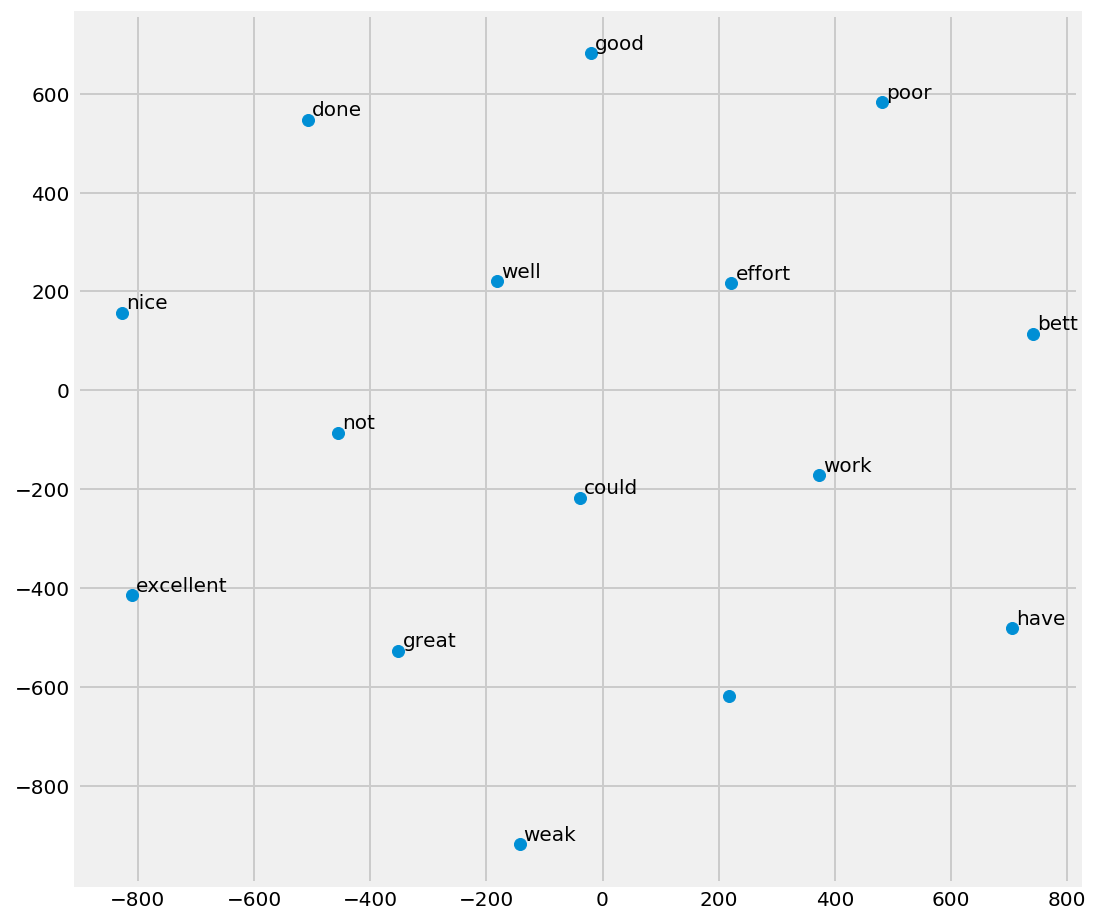

In [12]:

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

words =  list(tokenizer.word_index.keys())
vectors = embeddings

Y = tsne.fit_transform(vectors)

fig,ax= plt.subplots(figsize=(8,8))
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
#     print(label,x,y)
    plt.annotate(label, xy=(x, y), clip_on=True, xytext=(2,2), textcoords="offset points")
plt.show()

#### Corpus context based embeddings

##### DIY

According to the authors' note, the recommended value is 10 for skip-gram and 5 for CBOW.[6]

In the continuous bag-of-words architecture, the model predicts the current word from a window of surrounding context words. The order of context words does not influence prediction (bag-of-words assumption). In the continuous skip-gram architecture, the model uses the current word to predict the surrounding window of context words. The skip-gram architecture weighs nearby context words more heavily than more distant context words.[1][5] According to the authors' note,[6] CBOW is faster while skip-gram is slower but does a better job for infrequent words.

In [69]:
# https://stackabuse.com/python-for-nlp-working-with-facebook-fasttext-library/
from tensorflow.keras.preprocessing.text import Tokenizer
from gensim.models.fasttext import FastText
import numpy as np
import matplotlib.pyplot as plt
import nltk
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from nltk import WordPunctTokenizer

In [289]:
#getting a slightly larger vocab, works better
docs = ['Well done! Much better than last time',
		'Good work. Keep it up',
		'Great effort. Keep it Going',
		'nice work. Better late than never',
		'Excellent! Good job',
		'Weak, not enough effort',
		'Poor effort! Even worse than last time',
		'not good. It needs to be better',
		'poor work. A bad assignment',
		'Could have done better, next time better']
# define class labels; i.e. the target
labels = array([1,1,1,1,1,0,0,0,0,0])

In [323]:
word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_docs = [word_punctuation_tokenizer.tokenize(sent) for sent in docs]
word_tokenized_docs = [[word.lower() for word in sent] for sent in word_tokenized_docs]

###### Word 2 vec

In [324]:
from gensim.models import Word2Vec

In [325]:

model = Word2Vec(word_tokenized_docs, min_count=0,size=8,workers=4)

In [326]:
model.wv.most_similar('poor')

[('going', 0.8649475574493408),
 ('better', 0.6015321016311646),
 ('job', 0.5443168878555298),
 ('good', 0.3830000162124634),
 ('keep', 0.3812030553817749),
 ('have', 0.33606404066085815),
 ('could', 0.29058462381362915),
 ('nice', 0.275199294090271),
 ('even', 0.26634979248046875),
 ('weak', 0.1952977478504181)]

In [327]:
model.wv.vocab['good'].index

5

In [328]:
model['good']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.01013248, -0.02764511, -0.01559362, -0.02348706,  0.00445385,
        0.03129455,  0.0227429 , -0.02418214], dtype=float32)

In [329]:
#Getting the word count
w2c = dict()
for item in model.wv.vocab:
    w2c[item]=model.wv.vocab[item].count

In [330]:
w2c

{'well': 1,
 'done': 2,
 '!': 3,
 'much': 1,
 'better': 5,
 'than': 3,
 'last': 2,
 'time': 3,
 'good': 3,
 'work': 3,
 '.': 5,
 'keep': 2,
 'it': 3,
 'up': 1,
 'great': 1,
 'effort': 3,
 'going': 1,
 'nice': 1,
 'late': 1,
 'never': 1,
 'excellent': 1,
 'job': 1,
 'weak': 1,
 ',': 2,
 'not': 2,
 'enough': 1,
 'poor': 2,
 'even': 1,
 'worse': 1,
 'needs': 1,
 'to': 1,
 'be': 1,
 'a': 1,
 'bad': 1,
 'assignment': 1,
 'could': 1,
 'have': 1,
 'next': 1}

In [331]:
w2cSorted=dict(sorted(w2c.items(), key=lambda x: x[1],reverse=True))

In [332]:
w2cSorted

{'better': 5,
 '.': 5,
 '!': 3,
 'than': 3,
 'time': 3,
 'good': 3,
 'work': 3,
 'it': 3,
 'effort': 3,
 'done': 2,
 'last': 2,
 'keep': 2,
 ',': 2,
 'not': 2,
 'poor': 2,
 'well': 1,
 'much': 1,
 'up': 1,
 'great': 1,
 'going': 1,
 'nice': 1,
 'late': 1,
 'never': 1,
 'excellent': 1,
 'job': 1,
 'weak': 1,
 'enough': 1,
 'even': 1,
 'worse': 1,
 'needs': 1,
 'to': 1,
 'be': 1,
 'a': 1,
 'bad': 1,
 'assignment': 1,
 'could': 1,
 'have': 1,
 'next': 1}

In [333]:

from scipy.spatial import distance


# distance of similarity
cosine = distance.cosine(padded_docs[1].tolist(), padded_docs[9].tolist())
print (docs[1])
print (docs[9])
print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')


Good work. Keep it up
Could have done better, next time better
Similarity of two sentences are equal to  78.19 %


In [334]:
def cosine_distance_wordembedding_method(s1, s2):
    import scipy
    vector_1 = np.mean([model[word] for word in s1],axis=0)
    vector_2 = np.mean([model[word] for word in s2],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    print('Word Embedding method with a cosine distance asses that our two sentences are similar to',round((1-cosine)*100,2),'%')
    
cosine_distance_wordembedding_method(word_tokenized_docs[1], word_tokenized_docs[9])  

Word Embedding method with a cosine distance asses that our two sentences are similar to 55.17 %


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


###### Fast text

In [335]:
embedding_size = 8
window_size = 2
min_word = 1
down_sampling = 1e-2

%time

ft_model = FastText(sentences=word_tokenized_docs,
                      size=embedding_size,
                      window=window_size,
                      min_count=min_word,
                      sample=down_sampling,
                      sg=1,
                      iter=10)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 6.91 µs


In [336]:
semantically_similar_words = {words: [item[0] for item in ft_model.wv.most_similar([words], topn=5)]
                  for words in list(tokenizer.word_index.keys())}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

work:['going', 'excellent', '!', 'better', 'could']
done:['not', 'going', 'needs', 'better', 'worse']
good:['than', 'last', 'job', 'have', 'excellent']
effort:['never', 'nice', 'well', 'bad', 'to']
poor:['a', ',', 'bad', 'excellent', '!']
well:['next', 'even', 'effort', 'work', 'bad']
great:['much', 'even', 'worse', 'could', 'weak']
nice:['to', 'effort', 'much', 'worse', '.']
excellent:[',', 'work', 'have', 'poor', 'going']
weak:['even', 'needs', 'assignment', 'time', 'great']
not:['better', 'last', 'keep', '!', 'going']
could:['work', 'next', 'going', 'excellent', 'have']
have:['late', 'up', 'than', 'excellent', 'good']
better:['!', 'not', 'it', 'last', 'work']


In [337]:
print(ft_model.wv.similarity(w1='good', w2='poor'))

-0.06640558


In [338]:
print(ft_model.wv.similarity(w1='excellent', w2='great'))

-0.57138026


In [339]:
print(ft_model.wv['excellent'])

[ 0.02263279  0.00422932  0.00094134  0.00434059  0.00893053  0.00987839
  0.00869684 -0.00598806]


True

##### Pre-trained Embedding

Pre-trained embedding matrices are available for many languages, trained on different corpuses (e.g. all Wikipedia pages, Google Newsgroups, Facebook posts) and with different size embeddings.  Depending on the task at hand it might pay off to be specific and verify what the embedding was trained on. Google Newsgroup based embeddings may perform better for a news topic classification problem, where Facebook posts based embeddings will for a more colloquial language oriented task.

###### Sources:

https://fasttext.cc/docs/en/crawl-vectors.html (by Facebook)  
These models were trained using CBOW with position-weights, in dimension 300, with character n-grams of length 5, a window of size 5 and 10 negatives.

>FastText
FastText is an extension to Word2Vec proposed by Facebook in 2016. Instead of feeding individual words into the Neural Network, FastText breaks words into several n-grams (sub-words). For instance, the tri-grams for the word apple is app, ppl, and ple (ignoring the starting and ending of boundaries of words). The word embedding vector for apple will be the sum of all these n-grams. After training the Neural Network, we will have word embeddings for all the n-grams given the training dataset. Rare words can now be properly represented since it is highly likely that some of their n-grams also appears in other words.

https://nlp.stanford.edu/projects/glove/ (by Stanford)  
GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

https://www.kaggle.com/crawford/20-newsgroups (by Google)

###### Which embedding size to take ?

The pre-trained models often come with different sizes of embeddings. Make sure the embedding size is fit for purpose. With the 10 sentence, 14 words, example used in this notebook using a 300 vector embedding is an obvious overkill. Reversely a 8 vector embedding on the Wikipedia corpus will have little discretionary power.

In [140]:
glove_file = open('/Users/maartenk/Documents/git/CookBooks/Sources/glove.6B.50d.txt', encoding="utf8")

In [17]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions

glove_file.close()

In [341]:
list(embeddings_dictionary.items())[:4]

[('the',
  array([ 4.1800e-01,  2.4968e-01, -4.1242e-01,  1.2170e-01,  3.4527e-01,
         -4.4457e-02, -4.9688e-01, -1.7862e-01, -6.6023e-04, -6.5660e-01,
          2.7843e-01, -1.4767e-01, -5.5677e-01,  1.4658e-01, -9.5095e-03,
          1.1658e-02,  1.0204e-01, -1.2792e-01, -8.4430e-01, -1.2181e-01,
         -1.6801e-02, -3.3279e-01, -1.5520e-01, -2.3131e-01, -1.9181e-01,
         -1.8823e+00, -7.6746e-01,  9.9051e-02, -4.2125e-01, -1.9526e-01,
          4.0071e+00, -1.8594e-01, -5.2287e-01, -3.1681e-01,  5.9213e-04,
          7.4449e-03,  1.7778e-01, -1.5897e-01,  1.2041e-02, -5.4223e-02,
         -2.9871e-01, -1.5749e-01, -3.4758e-01, -4.5637e-02, -4.4251e-01,
          1.8785e-01,  2.7849e-03, -1.8411e-01, -1.1514e-01, -7.8581e-01],
        dtype=float32)),
 (',', array([ 0.013441,  0.23682 , -0.16899 ,  0.40951 ,  0.63812 ,  0.47709 ,
         -0.42852 , -0.55641 , -0.364   , -0.23938 ,  0.13001 , -0.063734,
         -0.39575 , -0.48162 ,  0.23291 ,  0.090201, -0.13324 ,  0.078

Limiting the embedding matrix to those words in the corpus, this may speed up the process

In [342]:
embedding_matrix = zeros((vocab_size, 50))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

###### Using the pre-trained embedding 

An embedding is the weights of the hidden layer in the NN. 'Using a pre-trained model' is inserting the pre-trained weights in the embedding layer. With trainable=False the embeddings will say as inserted.

In [354]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Embedding

keras.backend.clear_session()
np.random.seed(1999)
tf.random.set_seed(1999)


deep_inputs = Input(shape=(length_long_sentence,))
embedding = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=length_long_sentence, 
                      trainable=False)(deep_inputs) 
flatten = Flatten()(embedding)
hidden = Dense(1, activation='sigmoid')(flatten)
model3 = Model(inputs=deep_inputs, outputs=hidden)

In [348]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model3.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
embedding (Embedding)        (None, 4, 50)             750       
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 951
Trainable params: 201
Non-trainable params: 750
_________________________________________________________________
None


In [349]:
model3.fit(padded_docs2, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model2.evaluate(padded_docs2, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 89.999998


In [350]:
embeddings_ = model3.layers[1].get_weights()[0]

In [353]:
embedding_matrix[3] == embeddings_[3]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [352]:
embeddings_[3]

array([-3.5586e-01,  5.2130e-01, -6.1070e-01, -3.0131e-01,  9.4862e-01,
       -3.1539e-01, -5.9831e-01,  1.2188e-01, -3.1943e-02,  5.5695e-01,
       -1.0621e-01,  6.3399e-01, -4.7340e-01, -7.5895e-02,  3.8247e-01,
        8.1569e-02,  8.2214e-01,  2.2220e-01, -8.3764e-03, -7.6620e-01,
       -5.6253e-01,  6.1759e-01,  2.0292e-01, -4.8598e-02,  8.7815e-01,
       -1.6549e+00, -7.7418e-01,  1.5435e-01,  9.4823e-01, -3.9520e-01,
        3.7302e+00,  8.2855e-01, -1.4104e-01,  1.6395e-02,  2.1115e-01,
       -3.6085e-02, -1.5587e-01,  8.6583e-01,  2.6309e-01, -7.1015e-01,
       -3.6770e-02,  1.8282e-03, -1.7704e-01,  2.7032e-01,  1.1026e-01,
        1.4133e-01, -5.7322e-02,  2.7207e-01,  3.1305e-01,  9.2771e-01],
      dtype=float32)

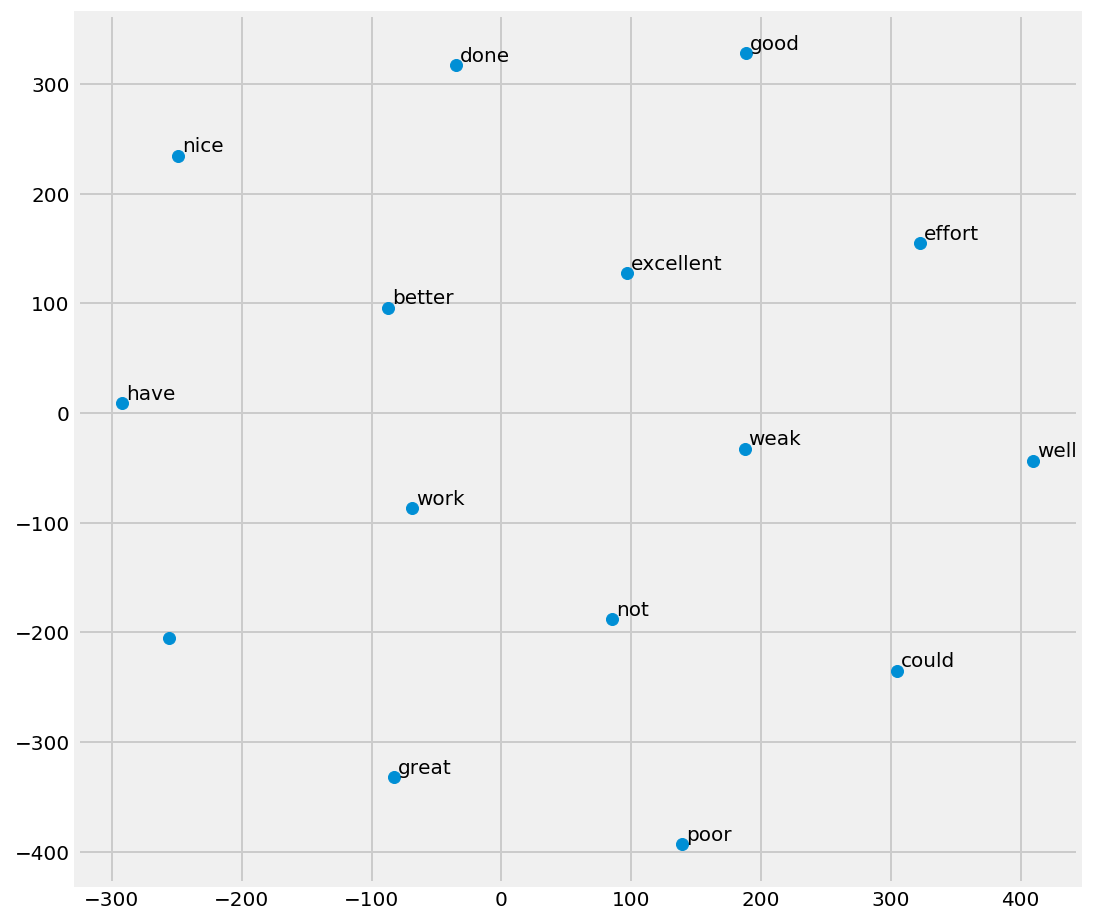

In [52]:

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

words =  list(tokenizer.word_index.keys())
vectors = embeddings

Y = tsne.fit_transform(vectors)

fig,ax= plt.subplots(figsize=(8,8))
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
#     print(label,x,y)
    plt.annotate(label, xy=(x, y), clip_on=True, xytext=(2,2), textcoords="offset points")
plt.show()

with trainable=True the NN weights will be initialized with the pre-trained and then trained on the target 

In [355]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Embedding

keras.backend.clear_session()
np.random.seed(1999)
tf.random.set_seed(1999)


deep_inputs = Input(shape=(length_long_sentence,))
embedding = Embedding(vocab_size, 50, weights=[embedding_matrix], input_length=length_long_sentence, 
                      trainable=True)(deep_inputs) 
flatten = Flatten()(embedding)
hidden = Dense(1, activation='sigmoid')(flatten)
model3 = Model(inputs=deep_inputs, outputs=hidden)

In [356]:
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model3.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
embedding (Embedding)        (None, 4, 50)             750       
_________________________________________________________________
flatten (Flatten)            (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 951
Trainable params: 951
Non-trainable params: 0
_________________________________________________________________
None


In [357]:
model3.fit(padded_docs2, labels, epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model2.evaluate(padded_docs2, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

Accuracy: 89.999998


In [358]:
embeddings_ = model3.layers[1].get_weights()[0]

In [359]:
embedding_matrix[3] == embeddings_[3]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

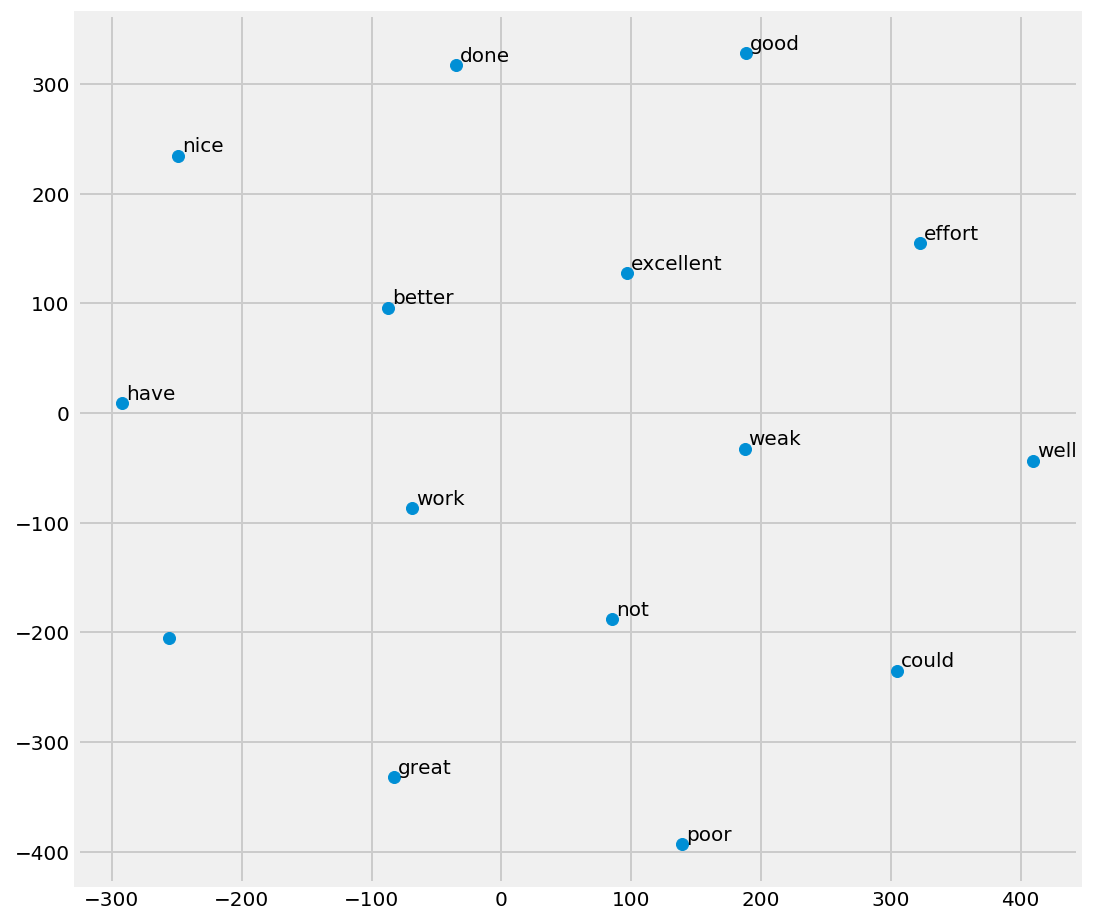

In [360]:

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

words =  list(tokenizer.word_index.keys())
vectors = embeddings

Y = tsne.fit_transform(vectors)

fig,ax= plt.subplots(figsize=(8,8))
plt.scatter(Y[:, 0], Y[:, 1])
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
#     print(label,x,y)
    plt.annotate(label, xy=(x, y), clip_on=True, xytext=(2,2), textcoords="offset points")
plt.show()

## Word vector 'Magic'

Some famous examples 

In [246]:
# https://www.kaggle.com/ankitswarnkar/word-embedding-using-glove-vector
def read_data(file_name):
    with open(file_name,'r') as f:
        word_vocab = set() # not using list to avoid duplicate entry
        word2vector = {}
        for line in f:
            line_ = line.strip() #Remove white space
            words_Vec = line_.split()
            word_vocab.add(words_Vec[0])
            word2vector[words_Vec[0]] = np.array(words_Vec[1:],dtype=float)
    print("Total Words in DataSet:",len(word_vocab))
    return word_vocab,word2vector

In [248]:
vocab, w2v = read_data('/Users/maartenk/Documents/git/CookBooks/Sources/glove.6B.50d.txt')


Total Words in DataSet: 400000


In [249]:
def cos_sim(u,v):
    """
    u: vector of 1st word
    v: vector of 2nd Word
    """
    numerator_ = u.dot(v)
    denominator_= np.sqrt(np.sum(np.square(u))) * np.sqrt(np.sum(np.square(v)))
    return numerator_/denominator_

In [250]:
all_words = w2v.keys()

In [258]:
print("Similarity Score of King and Queen",cos_sim(w2v['king'],w2v['queen']))
print("Similarity Score of Mother and Pizza",cos_sim(w2v['mother'],w2v['pizza']))
print("Similarity Score of Man and Pizza",cos_sim(w2v['man'],w2v['pizza']))
print("Similarity Score of Mother and baby",cos_sim(w2v['mother'],w2v['baby']))

Similarity Score of King and Queen 0.7839043010964117
Similarity Score of Mother and Pizza 0.25570543401374873
Similarity Score of Man and Pizza 0.3399827858775285
Similarity Score of Mother and baby 0.7502298772361725


In [267]:
def return_matrix(random_words,dim =50):
    word_matrix = np.random.randn(len(random_words),dim)
    i = 0
    for word in random_words:
        word_matrix[i] = w2v[word]
        i +=1
    return word_matrix

In [268]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [369]:
random_words = ['man','woman','king','queen','microwave','baby','boy','girl','pizza','royal',
                'mother','father','doctor', 'nurse' ,'cook','throne']
return_matrix_ = return_matrix(random_words)
pca_ = PCA(n_components=2)
viz_data = pca_.fit_transform(return_matrix_) 

(-5, 6)

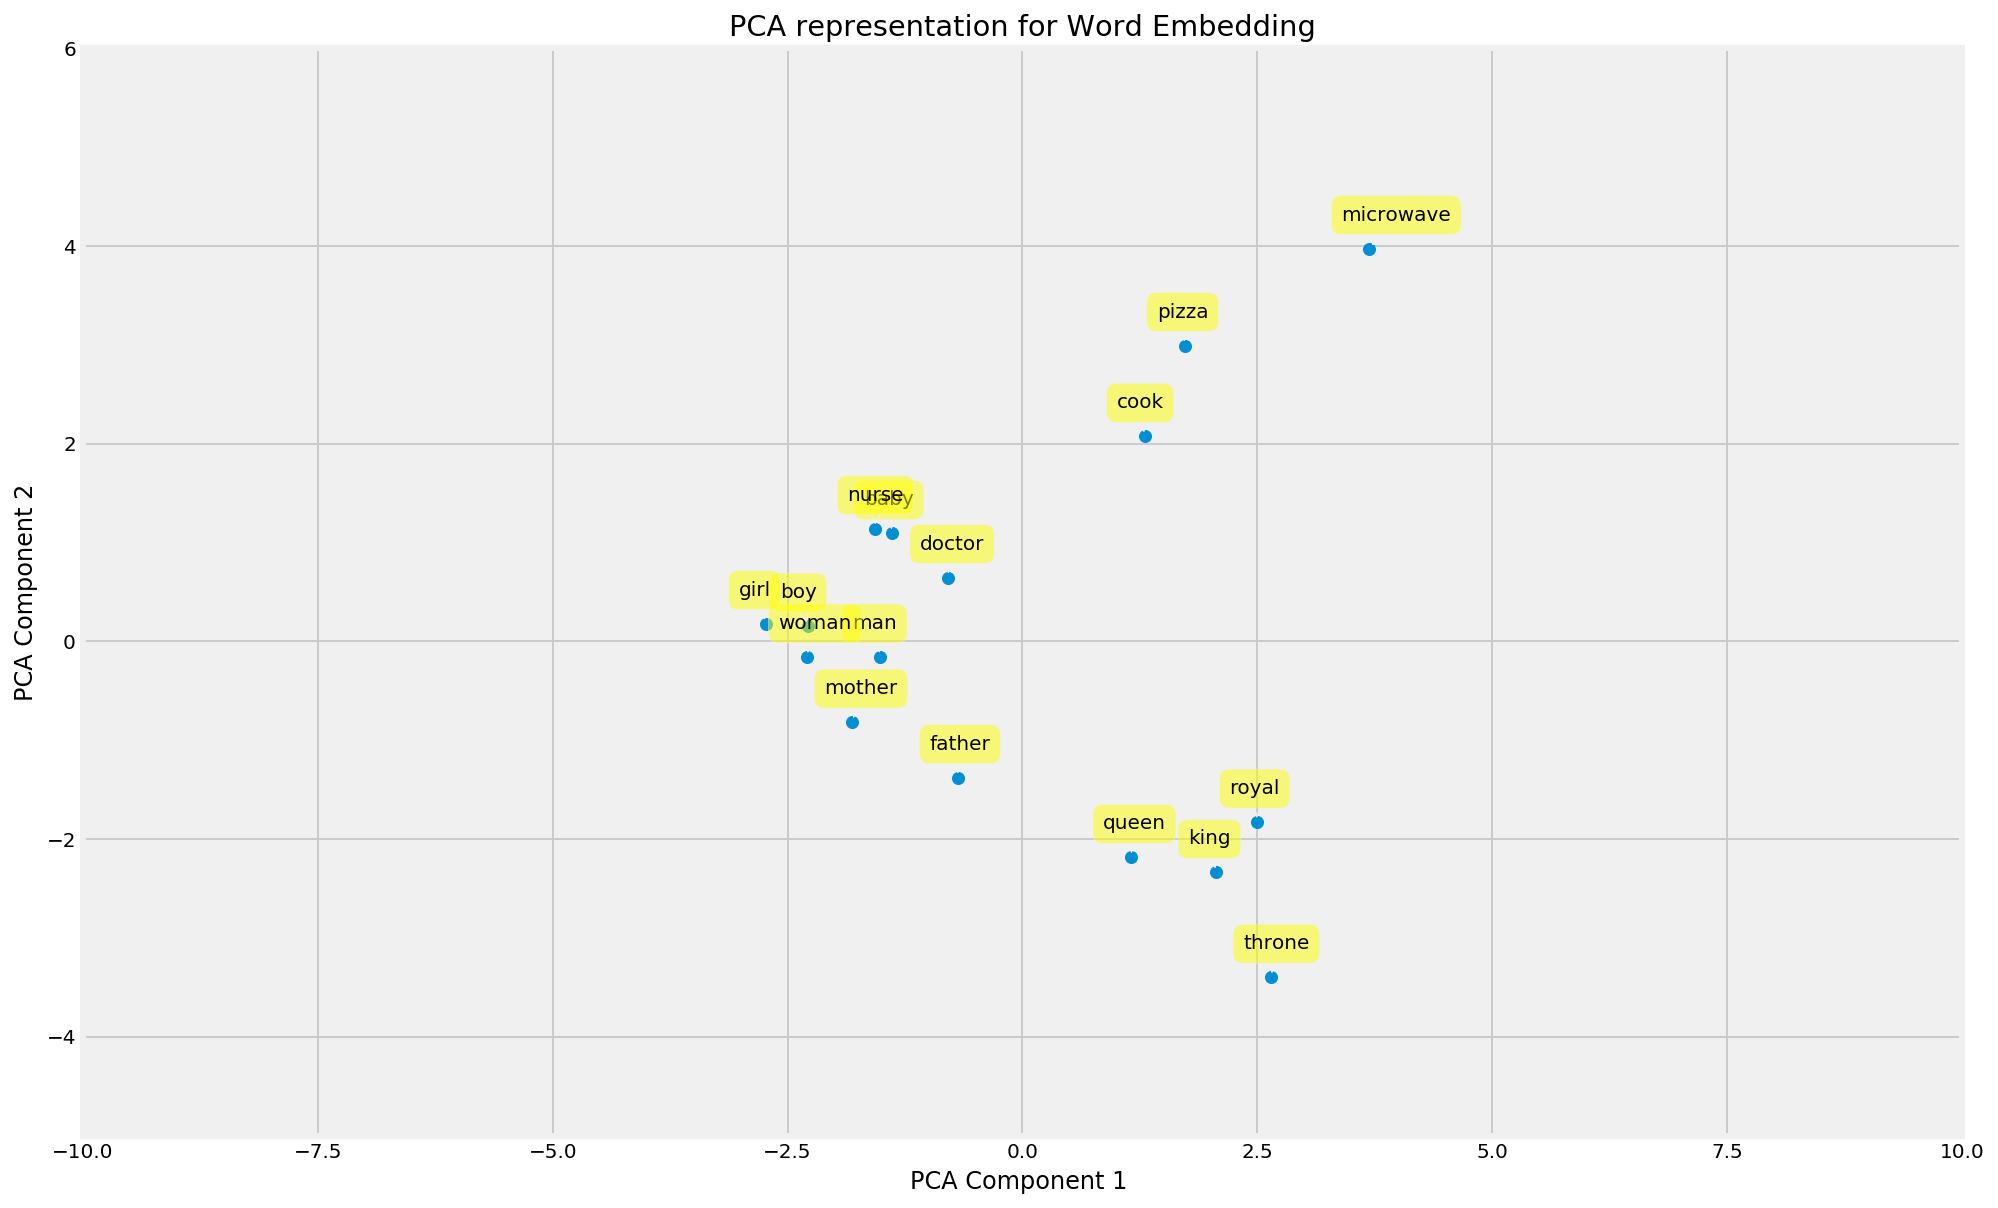

In [370]:
plt.scatter(viz_data[:,0],viz_data[:,1],cmap=plt.get_cmap('Spectral'))
for label,x,y in zip(random_words,viz_data[:,0],viz_data[:,1]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-14, 14),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
plt.xlabel('PCA Component 1 ')
plt.ylabel('PCA Component 2')
plt.title('PCA representation for Word Embedding')
plt.xlim(-10,10)
plt.ylim(-5,6)

In [371]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1,perplexity=3,method='exact')
tsne_results = tsne.fit_transform(return_matrix_)

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 16 / 16
[t-SNE] Mean sigma: 1.427605
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.098209
[t-SNE] KL divergence after 1000 iterations: 0.116696


Text(0.5, 1.0, 'TSNE representation for Word Embedding')

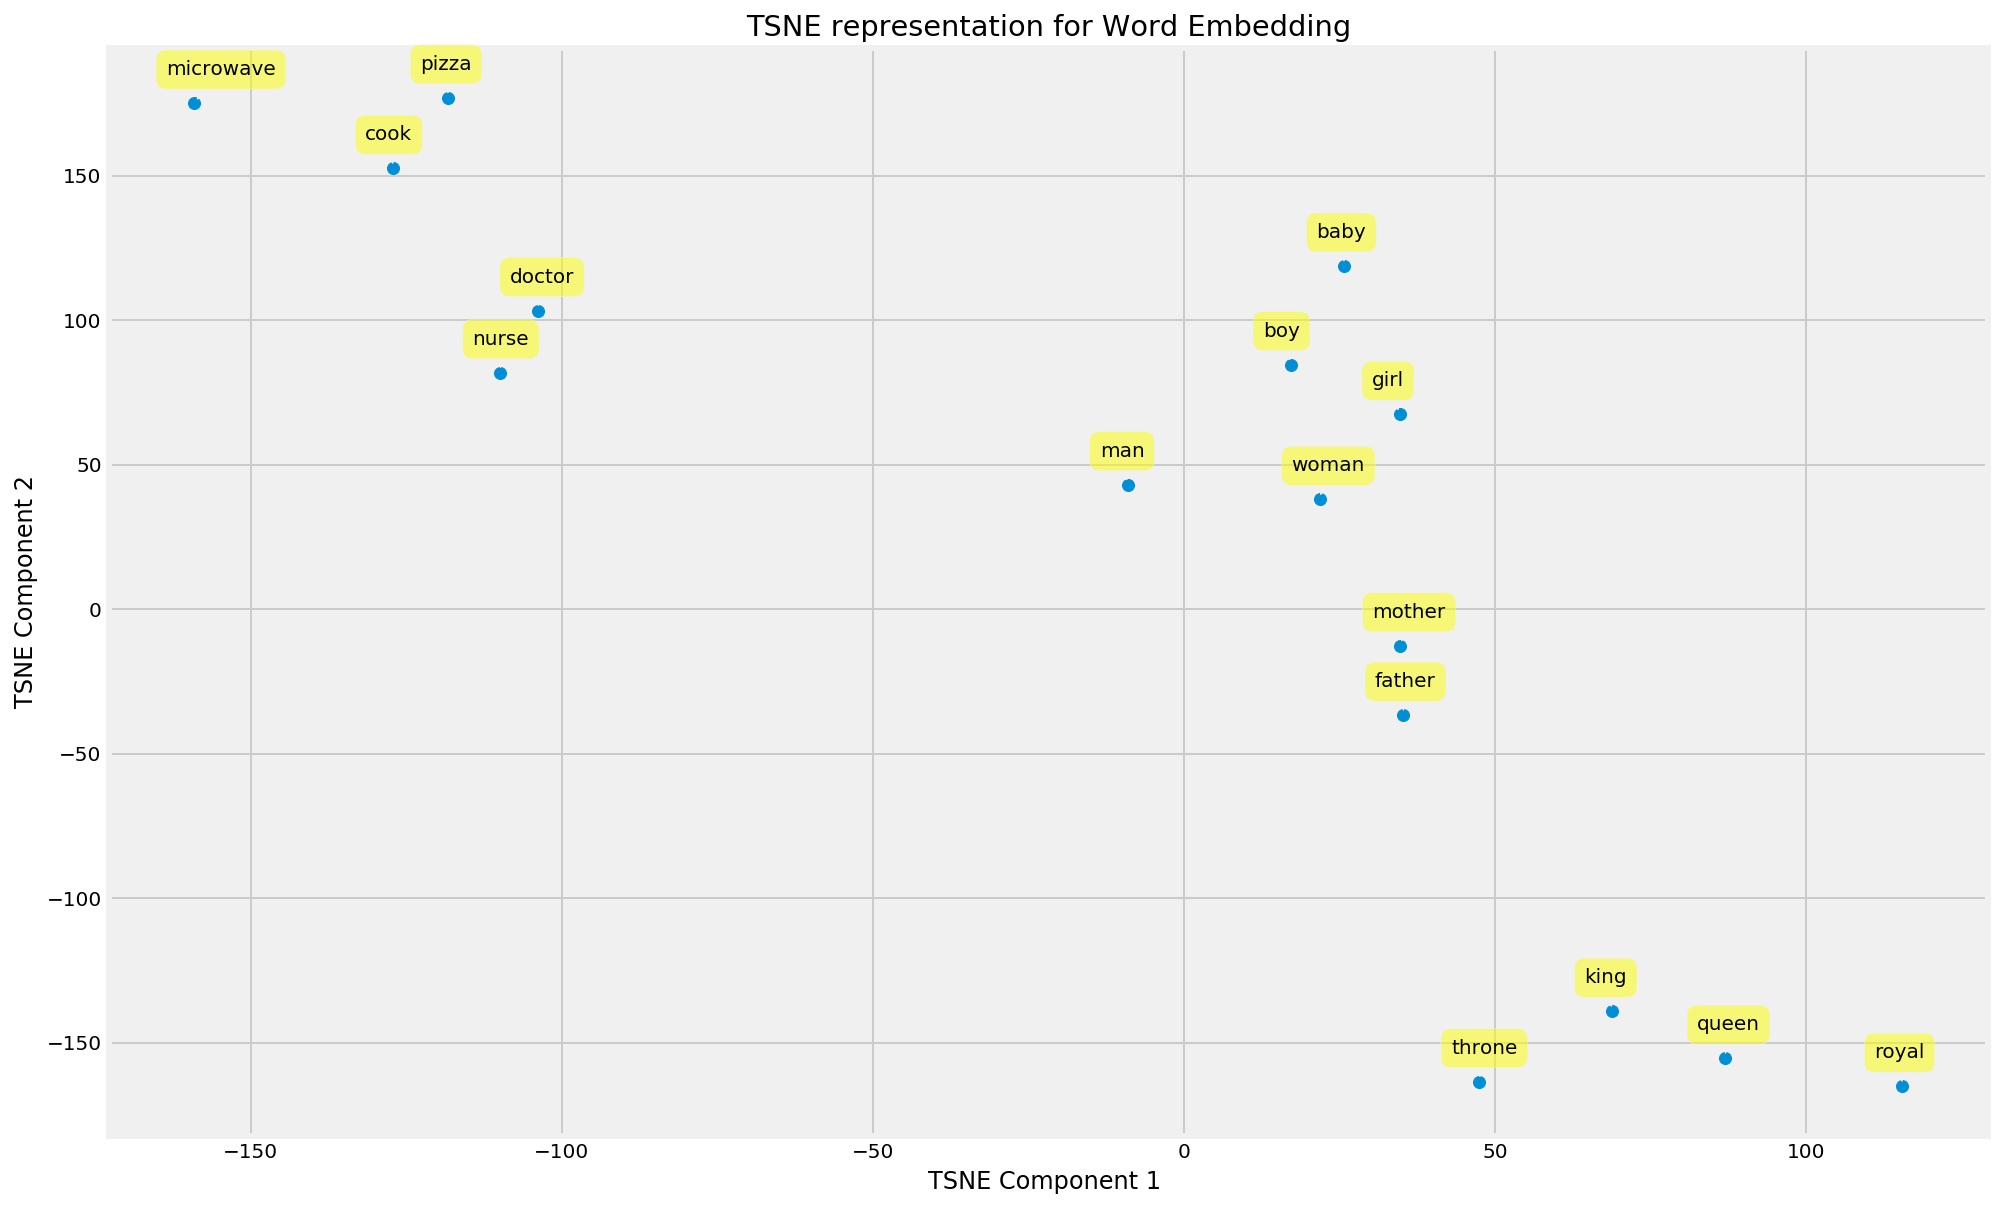

In [372]:
plt.scatter(tsne_results[:,0],tsne_results[:,1],cmap=plt.get_cmap('Spectral'))
for label,x,y in zip(random_words,tsne_results[:,0],tsne_results[:,1]):
    plt.annotate(
        label,
        xy=(x,y),
        xytext=(-14, 14),
        textcoords='offset points',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    )
plt.xlabel('TSNE Component 1 ')
plt.ylabel('TSNE Component 2')
plt.title('TSNE representation for Word Embedding')

In [274]:
def find_w4(word1,word2,word3, w2v):
    """
    """
    word_list = w2v.keys()
    max_sim = -1000
    #Make Sure they are lower
    word1,word2,word3 = word1.lower(),word2.lower(),word3.lower()
    diff_vec = w2v[word3] - (w2v[word1]-w2v[word2]) #word3 - (word1 - word2)
    for word in word_list:
        vec = w2v[word]
        sim_ = cos_sim(u=diff_vec,v=vec)
        if sim_ > max_sim:
            max_sim = sim_
            word_selected =  word
            
    return word_selected

In [278]:
print("King is to Queen as Man is to ",find_w4('king','queen','man',w2v))
print("Cook is to Pizza as Doctor is to ",find_w4('cook','pizza','doctor',w2v))
print("India is to Delhi as Netherlands is to ",find_w4('india','delhi','netherlands',w2v))
print("kid is to toy as doctor is to ",find_w4('kid','toy','doctor',w2v))

King is to Queen as Man is to  woman
Cook is to Pizza as Doctor is to  pizza
India is to Delhi as Netherlands is to  amsterdam
kid is to toy as doctor is to  medical


In [280]:
find_w4('man','doctor','woman',w2v)

'doctor'

In [281]:
find_w4('doctor','man','nurse',w2v)

'woman'

## Appendix

In [107]:
import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
        tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [131]:
en_stop = set(nltk.corpus.stopwords.words('english'))

sent = preprocess_text("Artificial intelligence, is the most advanced technology of the present era")
print(sent)


final_corpus = [preprocess_text(sentence) for sentence in docs if sentence.strip() !='']

word_punctuation_tokenizer = nltk.WordPunctTokenizer()
word_tokenized_corpus = [word_punctuation_tokenizer.tokenize(sent) for sent in final_corpus]

artificial intelligence advanced technology present


In [132]:
final_corpus

['well done much better last time',
 'good work keep',
 'great effort keep going',
 'nice work better late never',
 'excellent good',
 'weak enough effort',
 'poor effort even worse last time',
 'good need better',
 'poor work assignment',
 'could done better next time better']

https://medium.com/@adriensieg/text-similarities-da019229c894

https://www.machinelearningplus.com/nlp/cosine-similarity/

https://realpython.com/python-keras-text-classification/